In [13]:
%matplotlib inline
import pandas as pd
from IPython.display import display
## 数据源
df= pd.read_csv("https://raw.githubusercontent.com/leemengtaiwan/leemengtaiwan.github.io/dev/content/dataset/lol_champion_stats.tsv",sep="\t",index_col = "名稱")
print(df.shape)
print(df.head(5))
## 只查看均值和标准差
df_stats = df.describe().loc[['mean','std']]
df_stats.style.format("{:.2f}")

(147, 12)
      類型  攻擊距離   魔力  魔力回復  魔力提升  生命提升     生命  生命回復  移動速度  物理攻擊  物理防禦  魔法防禦
名稱                                                                        
厄薩斯   鬥士   175    0   0.0     0    90  580.0   3.0   345  60.0  38.0  32.1
阿璃    法師   550  418   0.8    25    92  526.0   6.5   330  53.0  20.9  30.0
阿卡莉   刺客   125  200   0.0     0    95  575.0   8.0   345  62.4  23.0  37.0
亞歷斯塔  坦克   125  350   0.8    40   106  573.4   8.5   330  61.1  44.0  32.1
阿姆姆   坦克   125  287   0.5    40    84  613.1   9.0   335  53.4  33.0  32.1


,攻擊距離,魔力,魔力回復,魔力提升,生命提升,生命,生命回復,移動速度,物理攻擊,物理防禦,魔法防禦
mean,326.39,309.66,0.57,33.03,88.52,555.83,6.60,336.31,59.37,30.06,31.13
std,196.52,115.40,0.28,16.62,6.65,37.33,1.78,7.56,6.17,6.72,1.71


In [ ]:
![PCA](https://leemeng.tw/essence-of-principal-component-analysis.html)



In [3]:
import numpy as np
from numpy.testing import assert_almost_equal
## 显示小数点后两位
np.set_printoptions(precision=2)
# 随机生成数据
rng = np.random.RandomState(1)

#初始化数据减去平均
W = rng.rand(2,2)
x_Normal = rng.normal(scale=5,size=(2,20))
#矩阵相乘
x_orig = W @ x_Normal
#?
x_Mean = x_orig.mean(axis=1)[:, np.newaxis]
x = x_orig-x_Mean
mean = x.mean(axis=1)


# 测试numbercial相等，确保样本平均为0
assert_almost_equal(0,mean)
print('x.shape:',x.shape,'\n')
print(x)

x.shape: (2, 20) 

[[ 2.89  0.32  5.8  -6.52  3.94 -4.21  0.45  2.14  1.3  -4.98 -2.4  -3.1
   0.69 -1.59 -3.64 -0.24  6.81  4.63 -2.24 -0.06]
 [ 1.52  0.91  1.52 -0.88 -0.03 -1.26 -0.25  0.96 -0.89 -0.45 -0.88 -1.12
  -0.86  0.13 -1.53  0.51  2.66  1.28 -0.14 -1.19]]


In [4]:
# 考虑到目前的数据格式是（n_feature,n_sampele）,转置为（n_sample,n_feature）
# 也就是，行为sample，列是不同的特征属性
# 一行为一个样本，索引行从0开始
x[:,0]

array([2.89, 1.52])

In [9]:
assert_almost_equal(x[:,0],x.T[0])
x.T[:,0]

array([2.89, 1.52])

In [11]:
x[:,:6]

array([[ 2.89,  0.32,  5.8 , -6.52,  3.94, -4.21],
       [ 1.52,  0.91,  1.52, -0.88, -0.03, -1.26]])

<video controls src="https://leemeng.tw/images/pca/IndexingDataMatrixScene.mp4" />

<video controls src="https://leemeng.tw/images/pca/PlotDataOnCartesianBasisScene.mp4" />

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x[0],x[1])


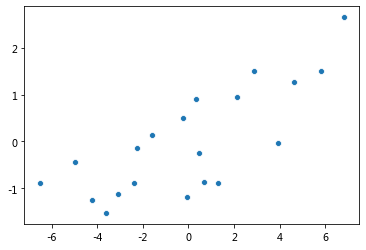

In [16]:
import seaborn as sns
sns.scatterplot(x[0,:],x[1, :])
plt.show()

<video controls src="https://leemeng.tw/images/pca/Project2Dto1DEmbeddedNumberLine.mp4" />



In [19]:
v = np.array([0.9691344,0.246533])
print(v)
assert_almost_equal(1,np.linalg.norm(v))
# 使用v 建立一个投影矩阵p1
p1 = v[np.newaxis,:]
print(p1)
l = p1 @ x
print(l[:,:4])



[0.97 0.25]
[[0.97 0.25]]
[[ 3.18  0.53  5.99 -6.53]]


> 事實上這就是線性降維與 PCA 的核心精神：將原始數據拆解成更具代表性的主成分，並以其作為新的基準，重新描述數據